Decision Combinations and Corresponding Total Costs:
D1: 0, D2: 0, C: 0, R: 0, Total Cost: 28.6048
D1: 0, D2: 0, C: 0, R: 1, Total Cost: 28.6048
D1: 0, D2: 0, C: 1, R: 0, Total Cost: 31.6048
D1: 0, D2: 0, C: 1, R: 1, Total Cost: 32.1088
D1: 0, D2: 1, C: 0, R: 0, Total Cost: 31.6048
D1: 0, D2: 1, C: 0, R: 1, Total Cost: 31.6048
D1: 0, D2: 1, C: 1, R: 0, Total Cost: 34.6048
D1: 0, D2: 1, C: 1, R: 1, Total Cost: 35.108799999999995
D1: 1, D2: 0, C: 0, R: 0, Total Cost: 30.6048
D1: 1, D2: 0, C: 0, R: 1, Total Cost: 30.6048
D1: 1, D2: 0, C: 1, R: 0, Total Cost: 33.6048
D1: 1, D2: 0, C: 1, R: 1, Total Cost: 34.108799999999995
D1: 1, D2: 1, C: 0, R: 0, Total Cost: 33.6048
D1: 1, D2: 1, C: 0, R: 1, Total Cost: 33.6048
D1: 1, D2: 1, C: 1, R: 0, Total Cost: 36.6048
D1: 1, D2: 1, C: 1, R: 1, Total Cost: 37.108799999999995

Best Decision: (0, 0, 0, 0), Minimum Total Cost: 28.6048


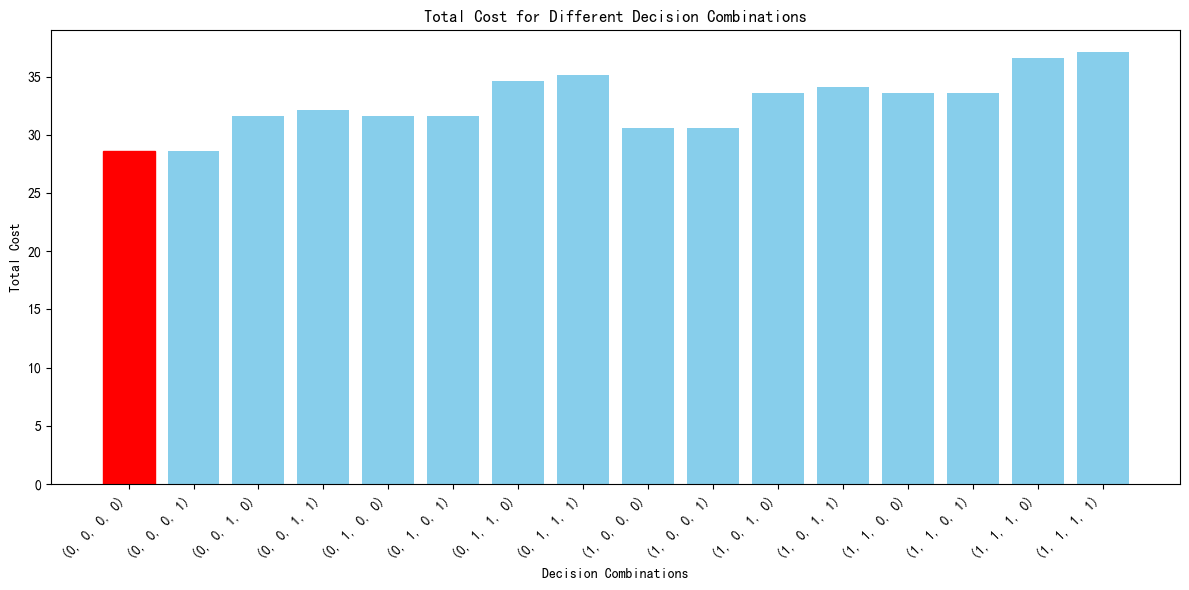

In [20]:
import numpy as np

# Parameters
params = {
    'p1': 0.1008, 'p2': 0.1008, 'c1': 4, 'c2': 18, 'd1': 2, 'd2': 3,
    'pf': 0.1008, 'a': 6, 'df': 3, 's': 56, 'l': 6, 'r': 5
}


import matplotlib.pyplot as plt

# Decision variables
decisions = [0, 1]

# Total cost calculation function
def calculate_total_cost(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    total_cost = cost_parts + cost_assembly + cost_rework + loss_replacement
    return total_cost

# Variables to track minimum cost and best decision
min_cost = np.inf
best_decision = None

print("Decision Combinations and Corresponding Total Costs:")

# Lists to store decision combinations and their total costs for plotting
decision_combinations = []
total_costs = []

# Iterate through all decision combinations and print results
for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                total_cost = calculate_total_cost(D1, D2, C, R, params)
                print(f"D1: {D1}, D2: {D2}, C: {C}, R: {R}, Total Cost: {total_cost}")
                decision_combinations.append((D1, D2, C, R))
                total_costs.append(total_cost)
                if total_cost < min_cost:
                    min_cost = total_cost
                    best_decision = (D1, D2, C, R)

print(f"\nBest Decision: {best_decision}, Minimum Total Cost: {min_cost}")

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(total_costs)), total_costs, color='skyblue')

# Highlight the bar with the minimum total cost
min_index = total_costs.index(min_cost)
bars[min_index].set_color('red')

plt.xlabel('Decision Combinations')
plt.ylabel('Total Cost')
plt.title('Total Cost for Different Decision Combinations')
plt.xticks(range(len(total_costs)), [f"{dc}" for dc in decision_combinations], rotation=45, ha='right')
plt.tight_layout()
plt.show()


决策组合及其对应的总成本:
D1: 0, D2: 0, C: 0, R: 0, Total Cost: 28.5
D1: 0, D2: 0, C: 0, R: 1, Total Cost: 28.5
D1: 0, D2: 0, C: 1, R: 0, Total Cost: 31.5
D1: 0, D2: 0, C: 1, R: 1, Total Cost: 33.5
D1: 0, D2: 1, C: 0, R: 0, Total Cost: 31.5
D1: 0, D2: 1, C: 0, R: 1, Total Cost: 31.5
D1: 0, D2: 1, C: 1, R: 0, Total Cost: 34.5
D1: 0, D2: 1, C: 1, R: 1, Total Cost: 36.5
D1: 1, D2: 0, C: 0, R: 0, Total Cost: 30.5
D1: 1, D2: 0, C: 0, R: 1, Total Cost: 30.5
D1: 1, D2: 0, C: 1, R: 0, Total Cost: 33.5
D1: 1, D2: 0, C: 1, R: 1, Total Cost: 35.5
D1: 1, D2: 1, C: 0, R: 0, Total Cost: 33.5
D1: 1, D2: 1, C: 0, R: 1, Total Cost: 33.5
D1: 1, D2: 1, C: 1, R: 0, Total Cost: 36.5
D1: 1, D2: 1, C: 1, R: 1, Total Cost: 38.5

最佳决策: (0, 0, 0, 0), 最小总成本: 28.5


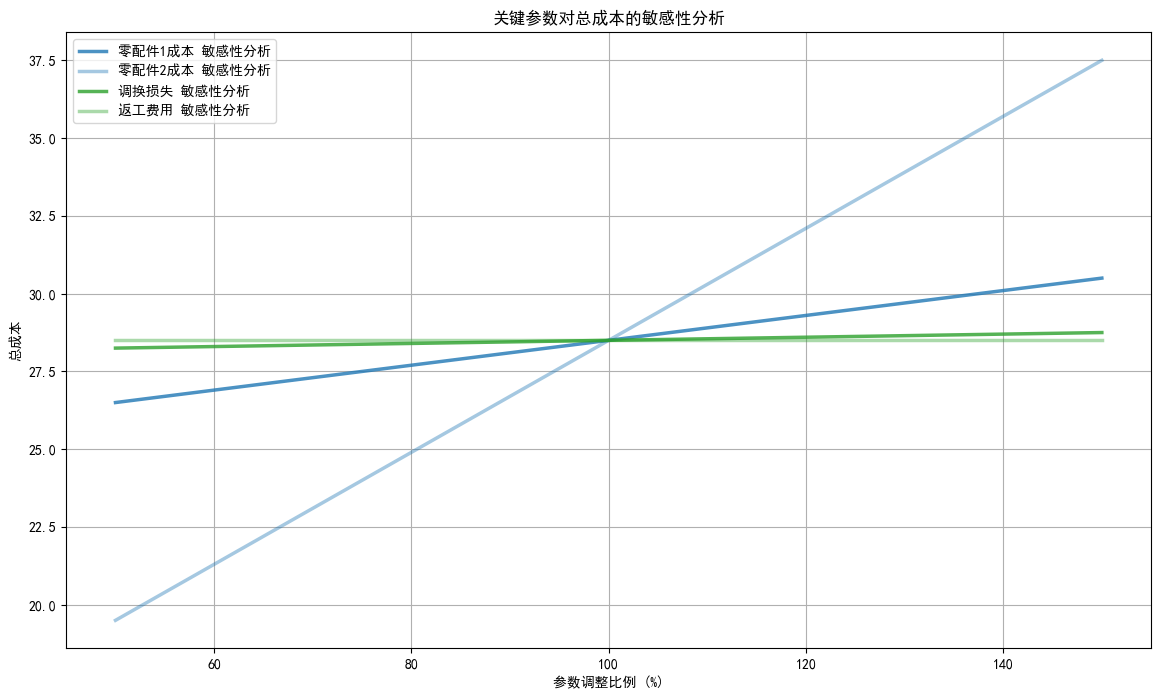

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字体，SimHei 是黑体，您也可以选择其他支持中文的字体如 Microsoft YaHei
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 参数设定
params = {
    'p1': 0.05, 'p2': 0.05, 'c1': 4, 'c2': 18, 'd1': 2, 'd2': 3,
    'pf': 0.05, 'a': 6, 'df': 3, 's': 56, 'l': 10, 'r': 40
}

# 决策变量
decisions = [0, 1]

# 总成本计算函数
def calculate_total_cost(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    total_cost = cost_parts + cost_assembly + cost_rework + loss_replacement
    return total_cost

# 遍历所有可能的决策组合
min_cost = np.inf
best_decision = None
results = []

print("决策组合及其对应的总成本:")

for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                total_cost = calculate_total_cost(D1, D2, C, R, params)
                results.append((D1, D2, C, R, total_cost))
                print(f"D1: {D1}, D2: {D2}, C: {C}, R: {R}, Total Cost: {total_cost}")
                if total_cost < min_cost:
                    min_cost = total_cost
                    best_decision = (D1, D2, C, R)

print(f"\n最佳决策: {best_decision}, 最小总成本: {min_cost}")

# 敏感性分析：调整关键参数并绘制对总成本的影响图
# 将 'c1', 'c2', 'l', 'r' 替换为它们的实际含义
sensitivity_params = {
    'c1': '零配件1成本', 
    'c2': '零配件2成本', 
    'l': '调换损失', 
    'r': '返工费用'
}
sensitivity_range = np.linspace(0.5, 1.5, 10)  # 将参数从原值的50%变化到150%

# 定义蓝绿色调的颜色方案
colors = {
    'c1': ('#1f77b4', 0.8),  # 深蓝色
    'c2': ('#1f77b4', 0.4),  # 浅蓝色
    'l': ('#2ca02c', 0.8),   # 深绿色
    'r': ('#2ca02c', 0.4)    # 浅绿色
}

# 绘制敏感性分析图
plt.figure(figsize=(14, 8))

for param, label in sensitivity_params.items():
    costs = []
    original_value = params[param]
    
    for factor in sensitivity_range:
        params[param] = original_value * factor  # 根据变化比例调整参数
        total_cost = calculate_total_cost(*best_decision, params)  # 计算调整后总成本
        costs.append(total_cost)
    
    params[param] = original_value  # 重置为原值
    color, alpha = colors[param]
    plt.plot(sensitivity_range * 100, costs, label=f'{label} 敏感性分析', linewidth=2.5, color=color, alpha=alpha)  # 设置线条颜色和透明度

plt.title('关键参数对总成本的敏感性分析')
plt.xlabel('参数调整比例 (%)')
plt.ylabel('总成本')
plt.legend()
plt.grid(True)
plt.show()


决策组合及其对应的总成本:
D1: 0, D2: 0, C: 0, R: 0, Total Cost: 28.5
D1: 0, D2: 0, C: 0, R: 1, Total Cost: 28.5
D1: 0, D2: 0, C: 1, R: 0, Total Cost: 31.5
D1: 0, D2: 0, C: 1, R: 1, Total Cost: 33.5
D1: 0, D2: 1, C: 0, R: 0, Total Cost: 31.5
D1: 0, D2: 1, C: 0, R: 1, Total Cost: 31.5
D1: 0, D2: 1, C: 1, R: 0, Total Cost: 34.5
D1: 0, D2: 1, C: 1, R: 1, Total Cost: 36.5
D1: 1, D2: 0, C: 0, R: 0, Total Cost: 30.5
D1: 1, D2: 0, C: 0, R: 1, Total Cost: 30.5
D1: 1, D2: 0, C: 1, R: 0, Total Cost: 33.5
D1: 1, D2: 0, C: 1, R: 1, Total Cost: 35.5
D1: 1, D2: 1, C: 0, R: 0, Total Cost: 33.5
D1: 1, D2: 1, C: 0, R: 1, Total Cost: 33.5
D1: 1, D2: 1, C: 1, R: 0, Total Cost: 36.5
D1: 1, D2: 1, C: 1, R: 1, Total Cost: 38.5

最佳决策: (0, 0, 0, 0), 最小总成本: 28.5


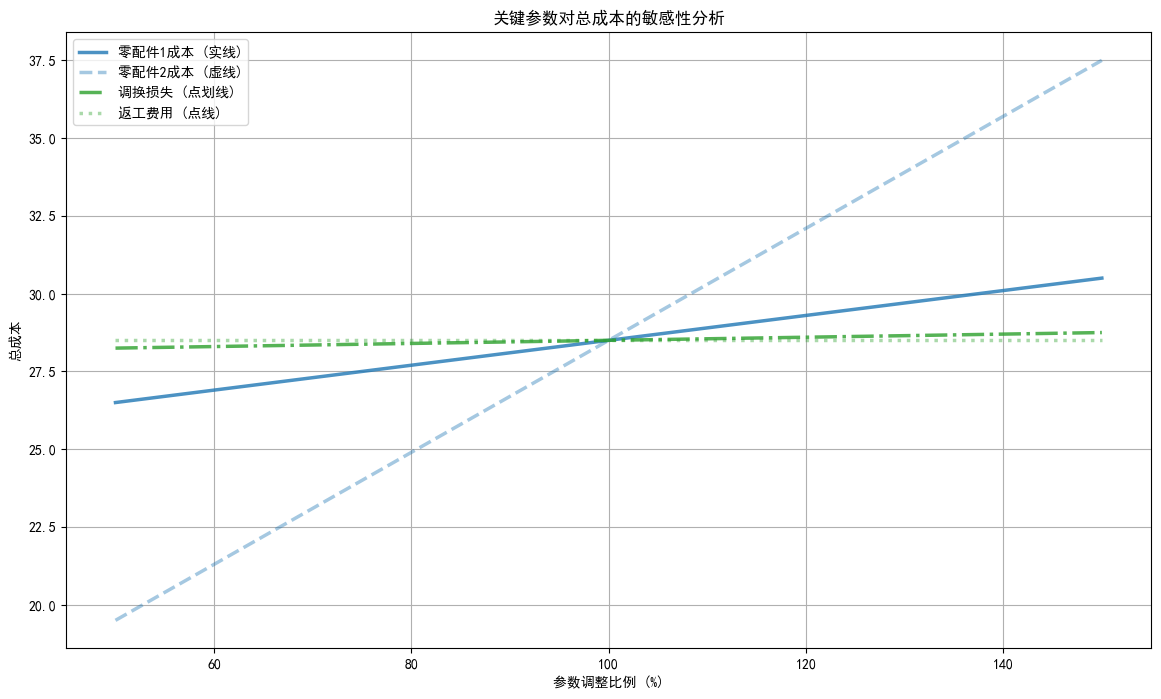

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字体，SimHei 是黑体，您也可以选择其他支持中文的字体如 Microsoft YaHei
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 参数设定
params = {
    'p1': 0.05, 'p2': 0.05, 'c1': 4, 'c2': 18, 'd1': 2, 'd2': 3,
    'pf': 0.05, 'a': 6, 'df': 3, 's': 56, 'l': 10, 'r': 40
}

# 决策变量
decisions = [0, 1]

# 总成本计算函数
def calculate_total_cost(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    total_cost = cost_parts + cost_assembly + cost_rework + loss_replacement
    return total_cost

# 遍历所有可能的决策组合
min_cost = np.inf
best_decision = None
results = []

print("决策组合及其对应的总成本:")

for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                total_cost = calculate_total_cost(D1, D2, C, R, params)
                results.append((D1, D2, C, R, total_cost))
                print(f"D1: {D1}, D2: {D2}, C: {C}, R: {R}, Total Cost: {total_cost}")
                if total_cost < min_cost:
                    min_cost = total_cost
                    best_decision = (D1, D2, C, R)

print(f"\n最佳决策: {best_decision}, 最小总成本: {min_cost}")

# 敏感性分析：调整关键参数并绘制对总成本的影响图
# 将 'c1', 'c2', 'l', 'r' 替换为它们的实际含义
sensitivity_params = {
    'c1': '零配件1成本', 
    'c2': '零配件2成本', 
    'l': '调换损失', 
    'r': '返工费用'
}
sensitivity_range = np.linspace(0.5, 1.5, 10)  # 将参数从原值的50%变化到150%

# 定义不同的线型、颜色和透明度方案
line_styles = {
    'c1': ('#1f77b4', '-', '实线', 0.8),   # 零配件1成本：深蓝实线
    'c2': ('#1f77b4', '--', '虚线', 0.4),  # 零配件2成本：浅蓝虚线
    'l': ('#2ca02c', '-.', '点划线', 0.8), # 调换损失：深绿点划线
    'r': ('#2ca02c', ':', '点线', 0.4)     # 返工费用：浅绿点线
}

# 绘制敏感性分析图
plt.figure(figsize=(14, 8))

for param, label in sensitivity_params.items():
    costs = []
    original_value = params[param]
    
    for factor in sensitivity_range:
        params[param] = original_value * factor  # 根据变化比例调整参数
        total_cost = calculate_total_cost(*best_decision, params)  # 计算调整后总成本
        costs.append(total_cost)
    
    params[param] = original_value  # 重置为原值
    color, linestyle, description, alpha = line_styles[param]
    plt.plot(sensitivity_range * 100, costs, label=f'{label} ({description})', linewidth=2.5, color=color, linestyle=linestyle,alpha=alpha)  # 设置线条样式

plt.title('关键参数对总成本的敏感性分析')
plt.xlabel('参数调整比例 (%)')
plt.ylabel('总成本')
plt.legend()
plt.grid(True)
plt.show()
